In [7]:
import pandas as pd
import numpy as np

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('emotion_frequency_dataset.csv')

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Validate the shuffled dataset
print(df.head())

    Emotion  Mood_Intensity  Sleep_Quality  Feedback  Age  Gender Time_of_Day  \
0      Fear               3              4         1   33  Female   Afternoon   
1  Surprise               1              4         6   25  Female       Night   
2     Angry               8              9         6   39  Female       Night   
3       Sad               5              9         6   46  Female       Night   
4     Angry               4              6         8   28  Female       Night   

       Location Weather     Activity   Frequency  
0          Work   Snowy     Relaxing  183.375410  
1  Public Space   Snowy  Socializing  125.262876  
2  Public Space   Snowy     Relaxing  134.551979  
3          Work   Snowy     Relaxing  145.977091  
4  Public Space   Snowy      Working  116.163437  


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Split the dataset into features and target
X = df.drop('Frequency', axis=1)
y = df['Frequency']

# Step 2: Convert categorical columns to one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 24.48288938099594
R^2 Score: 0.8930804106890217


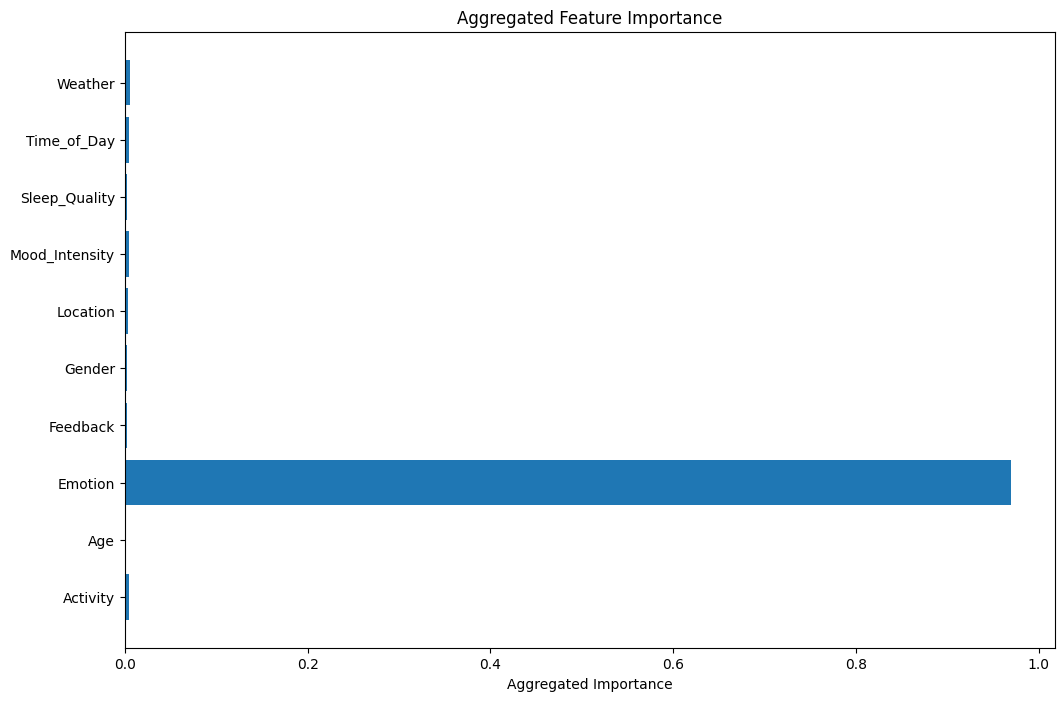

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Step 1: Create a mapping to aggregate feature importance
feature_mapping = {
    'Emotion_Angry': 'Emotion',
    'Emotion_Disgust': 'Emotion',
    'Emotion_Fear': 'Emotion',
    'Emotion_Happy': 'Emotion',
    'Emotion_Neutral': 'Emotion',
    'Emotion_Sad': 'Emotion',
    'Emotion_Surprise': 'Emotion',
    'Mood_Intensity': 'Mood_Intensity',
    'Sleep_Quality': 'Sleep_Quality',
    'Feedback': 'Feedback',
    'Age': 'Age',
    'Gender_Female': 'Gender',
    'Gender_Male': 'Gender',
    'Time_of_Day_Afternoon': 'Time_of_Day',
    'Time_of_Day_Evening': 'Time_of_Day',
    'Time_of_Day_Morning': 'Time_of_Day',
    'Time_of_Day_Night': 'Time_of_Day',
    'Location_Home': 'Location',
    'Location_Work': 'Location',
    'Location_Outdoors': 'Location',
    'Location_Public': 'Location',
    'Weather_Sunny': 'Weather',
    'Weather_Rainy': 'Weather',
    'Weather_Cloudy': 'Weather',
    'Weather_Snowy': 'Weather',
    'Activity_Relaxing': 'Activity',
    'Activity_Working': 'Activity',
    'Activity_Socializing': 'Activity',
    'Activity_Exercising': 'Activity',
}

# Step 2: Map the features to their aggregated categories
importance_df['Category'] = importance_df['Feature'].map(feature_mapping)

# Step 3: Aggregate the importances
aggregated_importance = importance_df.groupby('Category').sum().reset_index()

# Step 4: Visualize the aggregated feature importance
plt.figure(figsize=(12, 8))  # Optional: Set figure size for better readability
plt.barh(aggregated_importance['Category'], aggregated_importance['Importance'])
plt.xlabel('Aggregated Importance')
plt.title('Aggregated Feature Importance')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the XGBRegressor model
xgb_model = XGBRegressor()

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")

# Use the best model for prediction
best_xgb_model = grid_search.best_estimator_

# Predict and calculate evaluation metrics on the test set
y_pred = best_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Mean Squared Error: {mse}")
print(f"Optimized R² Score: {r2}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best MSE: 20.162408080664143
Optimized Mean Squared Error: 21.019360441524928
Optimized R² Score: 0.9082060392866976


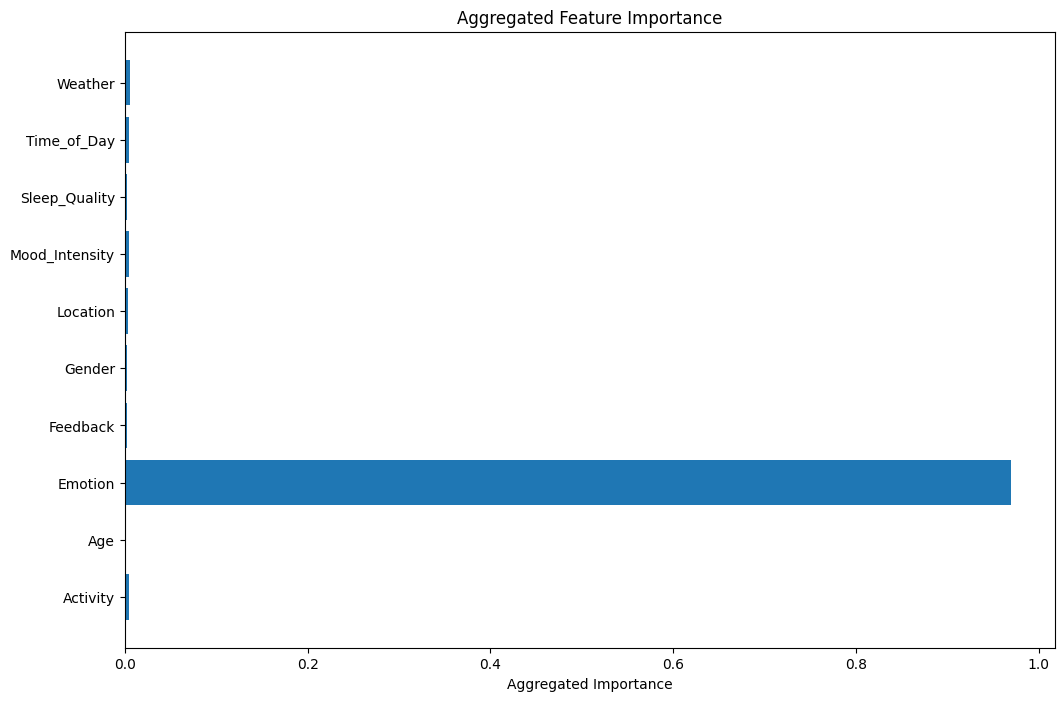

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Step 1: Create a mapping to aggregate feature importance
feature_mapping = {
    'Emotion_Angry': 'Emotion',
    'Emotion_Disgust': 'Emotion',
    'Emotion_Fear': 'Emotion',
    'Emotion_Happy': 'Emotion',
    'Emotion_Neutral': 'Emotion',
    'Emotion_Sad': 'Emotion',
    'Emotion_Surprise': 'Emotion',
    'Mood_Intensity': 'Mood_Intensity',
    'Sleep_Quality': 'Sleep_Quality',
    'Feedback': 'Feedback',
    'Age': 'Age',
    'Gender_Female': 'Gender',
    'Gender_Male': 'Gender',
    'Time_of_Day_Afternoon': 'Time_of_Day',
    'Time_of_Day_Evening': 'Time_of_Day',
    'Time_of_Day_Morning': 'Time_of_Day',
    'Time_of_Day_Night': 'Time_of_Day',
    'Location_Home': 'Location',
    'Location_Work': 'Location',
    'Location_Outdoors': 'Location',
    'Location_Public': 'Location',
    'Weather_Sunny': 'Weather',
    'Weather_Rainy': 'Weather',
    'Weather_Cloudy': 'Weather',
    'Weather_Snowy': 'Weather',
    'Activity_Relaxing': 'Activity',
    'Activity_Working': 'Activity',
    'Activity_Socializing': 'Activity',
    'Activity_Exercising': 'Activity',
}

# Step 2: Map the features to their aggregated categories
importance_df['Category'] = importance_df['Feature'].map(feature_mapping)

# Step 3: Aggregate the importances
aggregated_importance = importance_df.groupby('Category').sum().reset_index()

# Step 4: Visualize the aggregated feature importance
plt.figure(figsize=(12, 8))  # Optional: Set figure size for better readability
plt.barh(aggregated_importance['Category'], aggregated_importance['Importance'])
plt.xlabel('Aggregated Importance')
plt.title('Aggregated Feature Importance')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Save the model to a file in your Google Drive
joblib.dump(model, '/content/drive/My Drive/FINAL/xgb_model.joblib')

['/content/drive/My Drive/FINAL/xgb_model.joblib']

In [ ]:
import joblib

# Load the model
loaded_model = joblib.load('/content/drive/My Drive/FINAL/xgb_model.joblib')